# preparing our data
fattening our data(?) for the slaughter

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

/usr/lib/python3/dist-packages/pytz/__init__.py:31: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)


### loading the data/taking a peek at its quality

In [2]:
# spotify data
spotify_data = pd.read_csv("./data_for_project/Hot 100 Audio Features.csv")
# billboard hot 100 data
billboard_data = pd.read_csv("./data_for_project/Hot Stuff.csv") 

In [3]:
# taking a very quick peek at our data
spotify_data.head()

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,-14.063,1.0,0.0315,0.91100,0.000267,0.112,0.150,83.969,4.0,38.0
3,3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",1fHHq3qHU8wpRKHzhojZ4a,NaN,172066.0,False,Compelling Percussion,...,-17.278,0.0,0.0361,0.00256,0.745000,0.145,0.801,121.962,4.0,11.0
4,4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,False,...Baby One More Time (Digital Deluxe Version),...,-5.745,0.0,0.0307,0.20200,0.000131,0.443,0.907,92.960,4.0,77.0


In [4]:
# this data too
billboard_data.head()

,index,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,0,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4
1,1,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5
2,2,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6
3,3,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7
4,4,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8


In [5]:
# what data types do we have wrt billboard data?
# what still needs cleaning? 
datatypes_billboard = billboard_data.dtypes
datatypes_billboard
# seems like all the data are the datatypes we want them to be. 

index                       int64
url                        object
WeekID                     object
Week Position               int64
Song                       object
Performer                  object
SongID                     object
Instance                    int64
Previous Week Position    float64
Peak Position               int64
Weeks on Chart              int64
dtype: object

In [6]:
# what data types do we have wrt spotify data?
# what still needs cleaning? 
datatypes_spotify = spotify_data.dtypes
datatypes_spotify
# seems like all the data are the data types we want them to be. 

index                          int64
SongID                        object
Performer                     object
Song                          object
spotify_genre                 object
spotify_track_id              object
spotify_track_preview_url     object
spotify_track_duration_ms    float64
spotify_track_explicit        object
spotify_track_album           object
danceability                 float64
energy                       float64
key                          float64
loudness                     float64
mode                         float64
speechiness                  float64
acousticness                 float64
instrumentalness             float64
liveness                     float64
valence                      float64
tempo                        float64
time_signature               float64
spotify_track_popularity     float64
dtype: object

In [7]:
# we need to find a way to combine the sets together. 
# or for our purposes, we need to manipulate the data a bit. 

In [8]:
# seeing how this data is actually organised? what is weeks on chart?
# yeah, if we take a look at one song and see how the data is organised there, 
# we can get a better sense at how it looks elsewhere. 
# dunno if it's organised exclusively chronologically. 
first_song = billboard_data.where(billboard_data["Song"] == "Don't Just Stand There")
first_song = first_song.dropna()
first_song
# yeah, the entries on our chart are not perfectly chronological. weekid does...
# ...not correspond exactly to index. 

,index,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,0.0,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34.0,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1.0,45.0,34.0,4.0
1,1.0,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22.0,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1.0,34.0,22.0,5.0
2,2.0,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14.0,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1.0,22.0,14.0,6.0
3,3.0,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10.0,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1.0,14.0,10.0,7.0
4,4.0,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8.0,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1.0,10.0,8.0,8.0
5,5.0,http://www.billboard.com/charts/hot-100/1965-0...,8/21/1965,8.0,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1.0,8.0,8.0,9.0
6,6.0,http://www.billboard.com/charts/hot-100/1965-0...,8/28/1965,14.0,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1.0,8.0,8.0,10.0
7,7.0,http://www.billboard.com/charts/hot-100/1965-0...,9/4/1965,36.0,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1.0,14.0,8.0,11.0
3562,3562.0,http://www.billboard.com/charts/hot-100/1965-0...,7/3/1965,57.0,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1.0,79.0,57.0,2.0
3563,3563.0,http://www.billboard.com/charts/hot-100/1965-0...,7/10/1965,45.0,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1.0,57.0,45.0,3.0


In [9]:
# where did week one go
first_song.shape

(10, 11)

In [10]:
some_song = billboard_data.where(billboard_data["Song"] == "Rich As F**k")
some_song = some_song.dropna()
some_song

,index,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
27590,27590.0,http://www.billboard.com/charts/hot-100/2013-0...,5/25/2013,45.0,Rich As F**k,Lil Wayne Featuring 2 Chainz,Rich As F**kLil Wayne Featuring 2 Chainz,1.0,49.0,45.0,8.0
30726,30726.0,http://www.billboard.com/charts/hot-100/2013-0...,4/13/2013,74.0,Rich As F**k,Lil Wayne Featuring 2 Chainz,Rich As F**kLil Wayne Featuring 2 Chainz,1.0,78.0,74.0,2.0
39191,39191.0,http://www.billboard.com/charts/hot-100/2013-0...,4/20/2013,57.0,Rich As F**k,Lil Wayne Featuring 2 Chainz,Rich As F**kLil Wayne Featuring 2 Chainz,1.0,74.0,57.0,3.0
59914,59914.0,http://www.billboard.com/charts/hot-100/2013-0...,6/1/2013,46.0,Rich As F**k,Lil Wayne Featuring 2 Chainz,Rich As F**kLil Wayne Featuring 2 Chainz,1.0,45.0,45.0,9.0
73870,73870.0,http://www.billboard.com/charts/hot-100/2013-0...,5/4/2013,57.0,Rich As F**k,Lil Wayne Featuring 2 Chainz,Rich As F**kLil Wayne Featuring 2 Chainz,1.0,61.0,57.0,5.0
96638,96638.0,http://www.billboard.com/charts/hot-100/2013-0...,6/8/2013,45.0,Rich As F**k,Lil Wayne Featuring 2 Chainz,Rich As F**kLil Wayne Featuring 2 Chainz,1.0,46.0,45.0,10.0
101667,101667.0,http://www.billboard.com/charts/hot-100/2013-0...,6/15/2013,41.0,Rich As F**k,Lil Wayne Featuring 2 Chainz,Rich As F**kLil Wayne Featuring 2 Chainz,1.0,45.0,41.0,11.0
118217,118217.0,http://www.billboard.com/charts/hot-100/2013-0...,5/11/2013,52.0,Rich As F**k,Lil Wayne Featuring 2 Chainz,Rich As F**kLil Wayne Featuring 2 Chainz,1.0,57.0,52.0,6.0
138143,138143.0,http://www.billboard.com/charts/hot-100/2013-0...,4/27/2013,61.0,Rich As F**k,Lil Wayne Featuring 2 Chainz,Rich As F**kLil Wayne Featuring 2 Chainz,1.0,57.0,57.0,4.0
158852,158852.0,http://www.billboard.com/charts/hot-100/2013-0...,5/18/2013,49.0,Rich As F**k,Lil Wayne Featuring 2 Chainz,Rich As F**kLil Wayne Featuring 2 Chainz,1.0,52.0,49.0,7.0


In [11]:
some_song.shape
# seems like the true number of weeks = # of columns featuring a song minus one

(19, 11)

In [12]:
# huh?? do we have any '1' on weeks on chart? 
weeks_on_chart_1 = billboard_data.where(billboard_data["Weeks on Chart"] == 1.0)
weeks_on_chart_1 = weeks_on_chart_1.dropna()
weeks_on_chart_1
# bizarre. because we have ones in our datatable. 

,index,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart


In [13]:
# let's try a different number. 
weeks_on_chart_1 = billboard_data.where(billboard_data["Weeks on Chart"] == 2.0)
weeks_on_chart_1 = weeks_on_chart_1.dropna()
weeks_on_chart_1
# huh. can't be something wrong with my code, so. 

,index,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
9,9.0,http://www.billboard.com/charts/hot-100/1997-0...,4/26/1997,90.0,Don't Keep Wasting My Time,Teddy Pendergrass,Don't Keep Wasting My TimeTeddy Pendergrass,1.0,97.0,90.0,2.0
15,15.0,http://www.billboard.com/charts/hot-100/1971-0...,5/1/1971,61.0,Don't Knock My Love - Pt. 1,Wilson Pickett,Don't Knock My Love - Pt. 1Wilson Pickett,1.0,96.0,61.0,2.0
27,27.0,http://www.billboard.com/charts/hot-100/1974-0...,7/20/1974,76.0,Don't Knock My Love,Diana Ross & Marvin Gaye,Don't Knock My LoveDiana Ross & Marvin Gaye,1.0,90.0,76.0,2.0
36,36.0,http://www.billboard.com/charts/hot-100/1981-0...,4/4/1981,89.0,Don't Know Much,Bill Medley,Don't Know MuchBill Medley,1.0,90.0,89.0,2.0
40,40.0,http://www.billboard.com/charts/hot-100/1989-1...,10/7/1989,58.0,Don't Know Much,Linda Ronstadt (Featuring Aaron Neville),Don't Know MuchLinda Ronstadt (Featuring Aaron...,1.0,72.0,58.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
296315,296315.0,http://www.billboard.com/charts/hot-100/1992-0...,9/12/1992,64.0,You Lied To Me,Cathy Dennis,You Lied To MeCathy Dennis,1.0,83.0,64.0,2.0
296328,296328.0,http://www.billboard.com/charts/hot-100/1964-0...,3/28/1964,85.0,You Lied To Your Daddy,The Tams,You Lied To Your DaddyThe Tams,1.0,88.0,85.0,2.0
296333,296333.0,http://www.billboard.com/charts/hot-100/2011-0...,3/26/2011,81.0,You Lie,The Band Perry,You LieThe Band Perry,1.0,80.0,80.0,2.0
296353,296353.0,http://www.billboard.com/charts/hot-100/1973-0...,7/21/1973,67.0,You Light Up My Life/Believe In Humanity,Carole King,You Light Up My Life/Believe In HumanityCarole...,1.0,84.0,67.0,2.0


In [14]:
# maybe the ones are registered weird 
data_with_one = billboard_data.where(billboard_data["index"] == 42950)
data_with_one.dropna()
# seems like the data for a song that only spent one week on the chart isn't...
# even registered at all! 

,index,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart


In [15]:
# is this a pattern???
another_data_with_one = billboard_data.where(billboard_data["index"] == 42952)
another_data_with_one.dropna()
# seems to be 

,index,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart


In [16]:
# one more...
more_data_with_one = billboard_data.where(billboard_data["index"] == 8)
more_data_with_one.dropna()
# yeah seems to be a pattern. 
# how curious. 

,index,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart


### considering our aim

##### now that we've poked at our data a bit, let's think about how we want to predict success of a song on the billboard hot 100. 
the most successful songs would be the "most popular":
- those that are highest position on the chart
- for the longest amount of time
##### how do we account for this? 
(something fun and silly I’ve done is assign a number of “popularity points” corresponding to a song’s ranking. The higher the rank, the higher the number of points. More points will be added for each week the song is on the billboard. The number of popularity points one song has total will be the measure of its success.)
##### and how do we calculate this? 
why, we create a function that takes rank as input and spits a point value as output. we'd calculate the number of points for a song for every week, and then total the number of popularity points each song has. 

In [17]:
# we can just exclude the values that are not loaded and have
# an otherwise-precise means to account for popularity
other_list = []
def point_calculation(list_): 
    for i in list_:
        new_val = 100/i
        other_list.append(new_val)
    return other_list
# the higher the rank, the more points will be returned

In [18]:
# let's see if this function works. let's create a list of quantities
test_vals = list(range(1, 101))
print(test_vals[1:5])
# yeah

[2, 3, 4, 5]


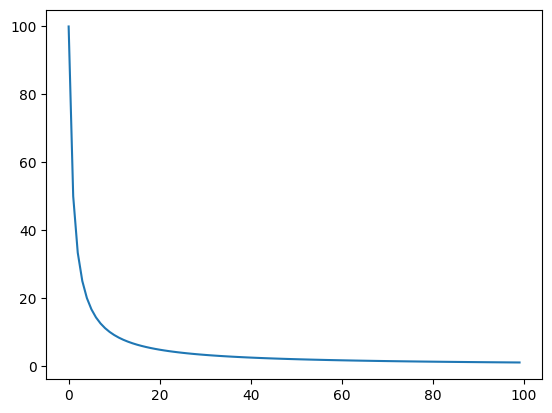

In [19]:
# seems like the calculator works exponentially, which is not what we want
plt.plot(point_calculation(test_vals))

In [20]:
# how do we make this linear 
# oh wait i'm dumb. 
# i shouldn't divide should i 
other_list_better = []
def point_calculation_better(list_): 
    for i in list_:
        new_val = 101-i 
        other_list_better.append(new_val)
    return other_list_better

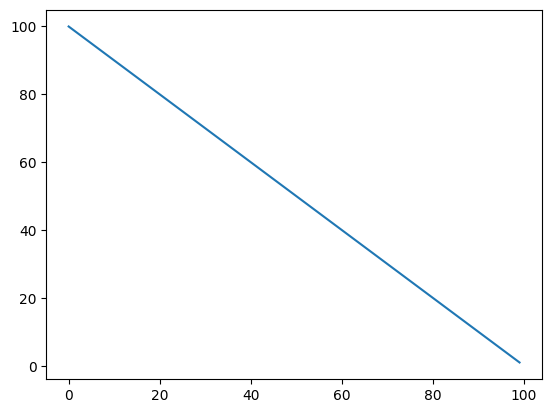

In [21]:
# let's plot to see if the function works as intended
plt.plot(point_calculation_better(test_vals))
# yippie! 

### executing our vision 

let's actually apply our function to the data, and then add our popularity points calculations to our data. 

In [22]:
# applying the popularity points calculation function to every row on the...
# billboard data

# one row in the billboard data represents one week. 
# recall that each week, a song gains a number of popularity points based on...
# ...its rank, and that the final metric of its popularity will be calculated by...
# ...totaling these numbers of points for each song.  

# we need to create a version that does not iterate over a list because...
# ...it's returning an error
def point_calculation_final(val): 
    new_val = 101-val
    return new_val
billboard_data["Popularity Points Awarded"] = billboard_data["Week Position"].apply(point_calculation_final)

In [23]:
# let's look at our new dataframe
billboard_data.head()

,index,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Popularity Points Awarded
0,0,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4,67
1,1,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5,79
2,2,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6,87
3,3,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7,91
4,4,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8,93


In [24]:
# i think i'll append the total number of points each song gets...
# ...to the spotify data dataframe. 

# how do we calculate the sum for each song 
total_points_by_song = pd.DataFrame(billboard_data.groupby(billboard_data["Song"])["Popularity Points Awarded"].sum())

# let's see what points we see.  
total_points_by_song.head()
# YEAHHHHHHHHH

,Popularity Points Awarded
Song,
"""B"" Girls",450
"""Cherry Cherry"" from Hot August Night",531
"""Having A Party"" Medley",225
"""Joy"" Pt. I",529
"""Roots"" Medley",213


In [25]:
# what songs have the MOST popularity points awarded
super_popular_pop = total_points_by_song.sort_values(by="Popularity Points Awarded", ascending=False)
super_popular_pop.head()
# IS THAT CRAZY BY SEAL I LOVE THAT SONG  
# edit: apparently it isnt 

,Popularity Points Awarded
Song,
Stay,13382
I Like It,12373
Angel,12164
Heaven,11543
Crazy,10124


In [26]:
# we can append these sums to the song attribute dataframe. 
# for each song name (i.e. the index of our total points dataframe), 
# we append to spotify entry

# i'm gonna take a quick survey of what we have in a way we can read more...
# ...easily
list_of_songs = spotify_data["Song"].to_list()
list_of_songs[0:10]

["-twistin'-White Silver Sands",
 '¿Dònde Està Santa Claus? (Where Is Santa Claus?)',
 '......And Roses And Roses',
 '...And Then There Were Drums',
 '...Baby One More Time',
 '...Ready For It?',
 "'03 Bonnie & Clyde",
 "'65 Love Affair",
 "'98 Thug Paradise",
 "'Round We Go"]

In [27]:
# W A I T. one issue
# some songs have the same titles
# AAAAAAAAAAAAAAAAAAA
# it's okay we can make sure they match for title AND artist
points_by_song_real = pd.DataFrame(billboard_data.groupby(["Song", "Performer"])["Popularity Points Awarded"].sum().reset_index())
points_by_song_real.head()

,Song,Performer,Popularity Points Awarded
0,"""B"" Girls",Young And Restless,450
1,"""Cherry Cherry"" from Hot August Night",Neil Diamond,531
2,"""Having A Party"" Medley",The Ovations (Featuring Louis Williams),225
3,"""Joy"" Pt. I",Isaac Hayes,529
4,"""Roots"" Medley",Quincy Jones,213


In [28]:
# let's try to view the top songs of all times again. 
real_super_popular_pop = points_by_song_real.sort_values(by="Popularity Points Awarded", ascending=False)
real_super_popular_pop.head()
# HELL YEAH I LOVE RADIOACTIVE 

,Song,Performer,Popularity Points Awarded
2874,Blinding Lights,The Weeknd,6920
19483,Radioactive,Imagine Dragons,5932
4180,Circles,Post Malone,5625
10190,How Do I Live,LeAnn Rimes,5615
7435,Foolish Games/You Were Meant For Me,Jewel,5499


In [29]:
# we're gonna write a function to append 'popularity points awarded'...
# ...to the song attributes dataframe.
# so we can see the popularity score for each unique track. 
spotify_data["Popularity Points Awarded"] = ''
points_songs_list = points_by_song_real["Popularity Points Awarded"].to_list()
artists_songs_list = points_by_song_real["Performer"].to_list()
titles_songs_list = points_by_song_real["Song"].to_list()
def append_pts_test(points, artists, titles, spotify):
    for i in range(len(points)): 
        point_value = points[i]
        artist = artists[i]
        title = titles[i]
        # chatgpt taught me about a thing called boolean indexing
        index = spotify[(spotify['Performer'] == artist) & (spotify['Song'] == title)].index
        spotify.loc[index, "Popularity Points Awarded"] = point_value
    return spotify

In [30]:
# it works but it's so so so so so so so so so so slow
# i calculated the amount of time it'd take and it'd take 48 hours to...
# ...run through the whole dataset 

# real data scientists also have to wait long times, but we only got so much time. 
spotify_head = spotify_data.head(10)

append_pts_test(points_songs_list, artists_songs_list, titles_songs_list, spotify_head)

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,Popularity Points Awarded
0,0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191
2,2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,1.0,0.0315,0.91100,0.000267,0.112,0.150,83.969,4.0,38.0,362
3,3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",1fHHq3qHU8wpRKHzhojZ4a,NaN,172066.0,False,Compelling Percussion,...,0.0,0.0361,0.00256,0.745000,0.145,0.801,121.962,4.0,11.0,112
4,4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,False,...Baby One More Time (Digital Deluxe Version),...,0.0,0.0307,0.20200,0.000131,0.443,0.907,92.960,4.0,77.0,2727
5,5,...Ready For It?Taylor Swift,Taylor Swift,...Ready For It?,"['pop', 'post-teen pop']",2yLa0QULdQr0qAIvVwN6B5,NaN,208186.0,False,"{'album_type': 'album', 'artists': [{'external...",...,1.0,0.1360,0.05270,0.000000,0.197,0.417,160.015,4.0,73.0,1126
6,6,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,Jay-Z Featuring Beyonce Knowles,'03 Bonnie & Clyde,"['east coast hip hop', 'hip hop', 'pop rap', '...",5ljCWsDlSyJ41kwqym2ORw,NaN,205560.0,True,The Blueprint 2 The Gift & The Curse,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,1944
7,7,'65 Love AffairPaul Davis,Paul Davis,'65 Love Affair,"['album rock', 'bubblegum pop', 'country rock'...",5nBp8F6tekSrnFg8G2Pvug,https://p.scdn.co/mp3-preview/a701445830ecacfb...,219813.0,False,Radio Hits Of the '80s,...,0.0,0.0274,0.43200,0.000006,0.133,0.952,155.697,4.0,40.0,1300
8,8,"'98 Thug ParadiseTragedy, Capone, Infinite","Tragedy, Capone, Infinite",'98 Thug Paradise,['english indie rock'],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50
9,9,'Round We GoBig Sister,Big Sister,'Round We Go,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11


In [31]:
# CHATGPT, I SUMMON YE, O FOUL DAEMON 
# it taught me a thing called 'merge' instead of having to loop through...
# ...multiple lists and a super long dataset. 
# and thank god that it works really, really, well, actually.
# useful data/EDA tool from here on out perhaps. 
spotify_data = spotify_data.merge(points_by_song_real, on=['Performer', 'Song'], how='left')
spotify_data.head()

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,Popularity Points Awarded_x,Popularity Points Awarded_y
0,0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,14.0
1,1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191,191.0
2,2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,0.0315,0.91100,0.000267,0.112,0.150,83.969,4.0,38.0,362,362.0
3,3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",1fHHq3qHU8wpRKHzhojZ4a,NaN,172066.0,False,Compelling Percussion,...,0.0361,0.00256,0.745000,0.145,0.801,121.962,4.0,11.0,112,112.0
4,4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,False,...Baby One More Time (Digital Deluxe Version),...,0.0307,0.20200,0.000131,0.443,0.907,92.960,4.0,77.0,2727,2727.0


In [32]:
# we can remove the 'points awarded x' column the merge function created. 
spotify_data = spotify_data.drop(["Popularity Points Awarded_x"], axis=1)
# we can also name the popularity points awarded_y column back to...
# ...what we meant for it to be named
spotify_data["Popularity Points Awarded"] = spotify_data["Popularity Points Awarded_y"]
spotify_data = spotify_data.drop(["Popularity Points Awarded_y"], axis=1)

In [33]:
# did that work 
spotify_data.head()
# yep! 

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,Popularity Points Awarded
0,0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
1,1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191.0
2,2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,1.0,0.0315,0.91100,0.000267,0.112,0.150,83.969,4.0,38.0,362.0
3,3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",1fHHq3qHU8wpRKHzhojZ4a,NaN,172066.0,False,Compelling Percussion,...,0.0,0.0361,0.00256,0.745000,0.145,0.801,121.962,4.0,11.0,112.0
4,4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,False,...Baby One More Time (Digital Deluxe Version),...,0.0,0.0307,0.20200,0.000131,0.443,0.907,92.960,4.0,77.0,2727.0


In [34]:
# export as .csv
spotify_data.to_csv("./data_for_project/spotify_data.csv")

In [35]:
# just double checking to ensure that the code is doing what we want. 
# we know it is doing what we want if top_5 (below) looks the same as...
# ...real_super_popular_pop from before. 
super_popular_pop_spotify = spotify_data.sort_values(by="Popularity Points Awarded", ascending=False)
top_5 = super_popular_pop_spotify.head()
top_5
# indeed! 

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,Popularity Points Awarded
2891,2891,Blinding LightsThe Weeknd,The Weeknd,Blinding Lights,"['canadian contemporary r&b', 'canadian pop', ...",0sf12qNH5qcw8qpgymFOqD,NaN,201573.0,False,Blinding Lights,...,1.0,0.0629,0.00147,0.000209,0.0938,0.345,171.017,4.0,96.0,6920.0
19571,19571,RadioactiveImagine Dragons,Imagine Dragons,Radioactive,['modern rock'],4G8gkOterJn0Ywt6uhqbhp,NaN,186813.0,False,Night Visions,...,1.0,0.0627,0.10600,0.000108,0.6680,0.236,136.245,4.0,74.0,5932.0
4201,4201,CirclesPost Malone,Post Malone,Circles,"['dfw rap', 'melodic rap', 'rap']",21jGcNKet2qwijlDFuPiPb,NaN,215280.0,False,Hollywood's Bleeding,...,1.0,0.0395,0.19200,0.002440,0.0863,0.553,120.042,4.0,98.0,5625.0
10240,10240,How Do I LiveLeAnn Rimes,LeAnn Rimes,How Do I Live,"['country', 'country dawn', 'dance pop', 'pop ...",7BD50ATrF3Vab5FQy7vtK8,https://p.scdn.co/mp3-preview/dfd7958f815b8496...,266973.0,False,Greatest Hits,...,1.0,0.0279,0.12800,0.000000,0.0822,0.258,128.303,4.0,68.0,5615.0
7469,7469,Foolish Games/You Were Meant For MeJewel,Jewel,Foolish Games/You Were Meant For Me,"['alaska indie', 'lilith', 'permanent wave', '...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5499.0


In [36]:
# so at this point, we got all what we want in our data table. 
# it's not JUST spotify data at this point so let's rename it
song_attribute_data = spotify_data
song_attribute_data.head(1)
# yup

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,Popularity Points Awarded
0,0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0


### eda/viz

In [37]:
# we are ready for some basic EDA and visualisation. we already did some EDA...
# ...when looking at the top songs. 

# let's fetch our top ten! 
top_10_tracks = super_popular_pop_spotify.head(10)
top_10_tracks
# i cannot stand shape of you, but radioactive remains a banger
# and party rock anthem disallows me from hearing 'every day i'm shuffling' normally. 

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,Popularity Points Awarded
2891,2891,Blinding LightsThe Weeknd,The Weeknd,Blinding Lights,"['canadian contemporary r&b', 'canadian pop', ...",0sf12qNH5qcw8qpgymFOqD,NaN,201573.0,False,Blinding Lights,...,1.0,0.0629,0.00147,0.000209,0.0938,0.345,171.017,4.0,96.0,6920.0
19571,19571,RadioactiveImagine Dragons,Imagine Dragons,Radioactive,['modern rock'],4G8gkOterJn0Ywt6uhqbhp,NaN,186813.0,False,Night Visions,...,1.0,0.0627,0.10600,0.000108,0.6680,0.236,136.245,4.0,74.0,5932.0
4201,4201,CirclesPost Malone,Post Malone,Circles,"['dfw rap', 'melodic rap', 'rap']",21jGcNKet2qwijlDFuPiPb,NaN,215280.0,False,Hollywood's Bleeding,...,1.0,0.0395,0.19200,0.002440,0.0863,0.553,120.042,4.0,98.0,5625.0
10240,10240,How Do I LiveLeAnn Rimes,LeAnn Rimes,How Do I Live,"['country', 'country dawn', 'dance pop', 'pop ...",7BD50ATrF3Vab5FQy7vtK8,https://p.scdn.co/mp3-preview/dfd7958f815b8496...,266973.0,False,Greatest Hits,...,1.0,0.0279,0.12800,0.000000,0.0822,0.258,128.303,4.0,68.0,5615.0
7469,7469,Foolish Games/You Were Meant For MeJewel,Jewel,Foolish Games/You Were Meant For Me,"['alaska indie', 'lilith', 'permanent wave', '...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5499.0
12164,12164,I'm YoursJason Mraz,Jason Mraz,I'm Yours,"['acoustic pop', 'neo mellow', 'pop', 'pop rock']",1EzrEOXmMH3G43AXT1y7pA,https://p.scdn.co/mp3-preview/c58f1bc916075433...,242186.0,False,We Sing. We Dance. We Steal Things.,...,1.0,0.0468,0.59500,0.000000,0.1050,0.718,150.953,4.0,83.0,5433.0
18771,18771,Party Rock AnthemLMFAO Featuring Lauren Bennet...,LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,"['dance pop', 'pop', 'pop rap']",0IkKz2J93C94Ei4BvDop7P,NaN,262173.0,False,Sorry For Party Rocking,...,0.0,0.1420,0.01890,0.000000,0.2660,0.359,129.993,4.0,68.0,5351.0
21155,21155,Shape Of YouEd Sheeran,Ed Sheeran,Shape Of You,"['pop', 'uk pop']",7qiZfU4dY1lWllzX7mPBI3,https://p.scdn.co/mp3-preview/84462d8e1e4d0f9e...,233712.0,False,"{'album_type': 'album', 'artists': [{'external...",...,0.0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,4.0,86.0,5202.0
4646,4646,Counting StarsOneRepublic,OneRepublic,Counting Stars,"['dance pop', 'neo mellow', 'piano rock', 'pop...",6sy3LkhNFjJWlaeSMNwQ62,NaN,257839.0,False,Native,...,0.0,0.0382,0.06540,0.000000,0.1150,0.477,122.017,4.0,75.0,5079.0
26645,26645,Uptown Funk!Mark Ronson Featuring Bruno Mars,Mark Ronson Featuring Bruno Mars,Uptown Funk!,"['dance pop', 'pop']",32OlwWuMpZ6b0aN2RZOeMS,https://p.scdn.co/mp3-preview/88a794d97fcb4475...,269666.0,False,Uptown Special,...,1.0,0.0824,0.00801,0.000082,0.0344,0.928,114.988,4.0,82.0,4963.0


In [38]:
# i'm interested to see what the top artists are. 
total_points_by_artist = pd.DataFrame(song_attribute_data.groupby(song_attribute_data["Performer"])["Popularity Points Awarded"].sum())
top_artists = total_points_by_artist.sort_values(by="Popularity Points Awarded", ascending=False)
top_artists.head(10)
# wholly unsurprising!
# unfortunately i was never a swiftie! 
# i am sorry if this breaks anyone's heart! 
# my middle-aged middle eastern father is a swiftie, though! 

,Popularity Points Awarded
Performer,
Taylor Swift,62770.0
Madonna,57369.0
Elton John,55477.0
Mariah Carey,51239.0
Drake,43008.0
Stevie Wonder,42542.0
The Beatles,42470.0
Michael Jackson,41169.0
Rihanna,38109.0


<BarContainer object of 7 artists>

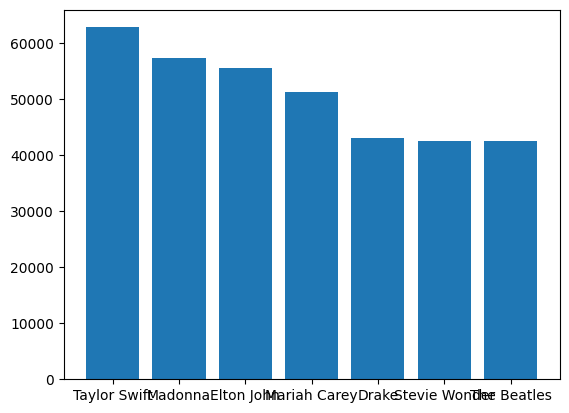

In [39]:
# let's see if we can visualise the success of these top artists! 
top_artists_7 = top_artists.head(7)
plt.bar(top_artists_7.index, top_artists_7["Popularity Points Awarded"])
# the decrease does not seem to be absurd. 
# it's not like there is one artist RADICALLY more successful than the others. 
# though i guess taylor is coming for your queen of pop title, madonna. 

# the axes are ugly but that doesn't really matter for EDA. 
# seems like there's a plateau past mariah carey. i wonder why this is. 

In [40]:
# we will focus on compositional aspects of songs most of the time, but...
# ...perhaps in our report we can also take a looksie at the prestige/fame of...
# ...certain musicians and how that allows their songs to be successful. 
# if it seems to be an issue, of course! 

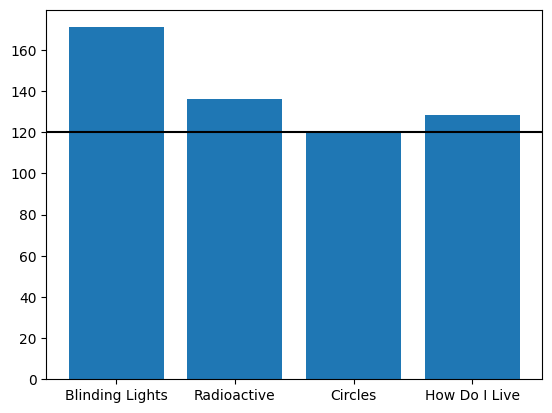

In [41]:
# what are the tempos of our top five? 

# here is a black line representing the mean 
plt.axhline(song_attribute_data["tempo"].mean(), color="black")
# here are some bars 
plt.bar(top_5["Song"], top_5["tempo"])
plt.show()
# tempo can be ludicrously different than average tempo. 
# and i didn't even realise blinding lights was that uptempo.
# many vary drastically from the average. 

# circles is the only one that is around average. 

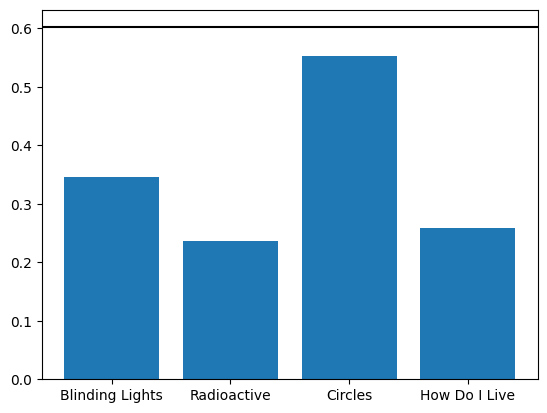

In [42]:
# what about valence 

# here is a black line representing the mean 
plt.axhline(song_attribute_data["valence"].mean(), color="black")
# here are some bars 
plt.bar(top_5["Song"], top_5["valence"])
plt.show()
# the average song is VERY happy, but our top five are less so.
# far less so, in fact. 
# i think people appreciate the uniqueness of more melancholy songs. 

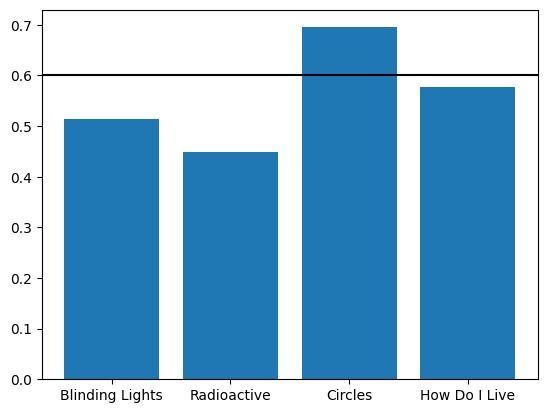

In [43]:
# danceability 

# black line representing the mean 
plt.axhline(song_attribute_data["danceability"].mean(), color="black")
# here are some bars 
plt.bar(top_5["Song"], top_5["danceability"])
plt.show()
# the top songs are less danceable than the average songs, which is surprising. 
# i thought they would be more so (the stereotype of catchy pop music and all).
# again, i think people probably appreciate the uniqueness of the songs that...
# ...do not quite adhere to the pop music stereotype. 

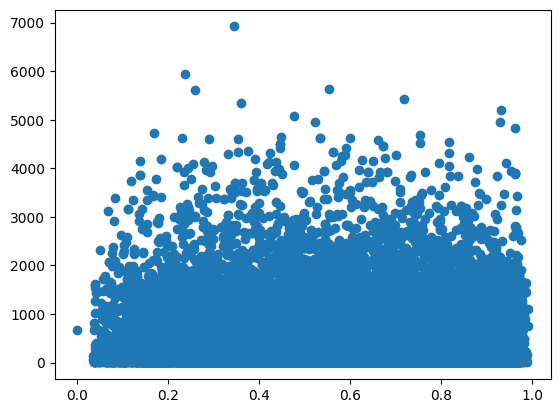

In [44]:
# i wanna look at something
# how does success correspond to valence for the whole dataset? 
# are the masses (me, i'm the masses) really that depressed? 
plt.scatter(song_attribute_data["valence"], song_attribute_data["Popularity Points Awarded"])
# this tells us NOTHING 

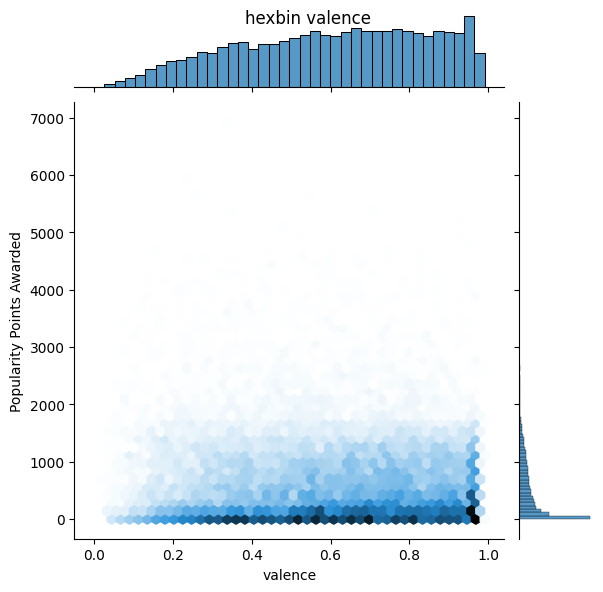

In [45]:
# let's try something else 
fig = sns.jointplot(data=song_attribute_data, y="Popularity Points Awarded",x="valence",kind='hex')
fig.fig.suptitle("hexbin valence")
plt.show()
# here we can see that interestingly - and ironically - popularity points seems...
# ...positively correlated with high valence, despite the fact that the top...
# ...songs are less happy than average. 

# perhaps people prefer more uplifting songs by and large, but the ones that...
# ...resonate the MOST deeply tend to be more melancholic. 
# as an avid music listener, pretty blatantly aware of the difference between...
# ...liking a song, and putting it on loop for a bit, versus being absolutely...
# obsessed. 

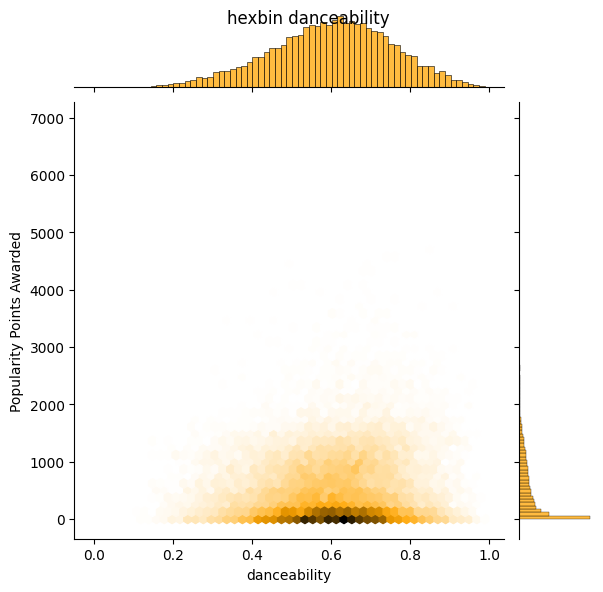

In [46]:
# curious to see what patterns exist for danceability, too
fig = sns.jointplot(data=song_attribute_data, y="Popularity Points Awarded",x="danceability",kind='hex', color="orange")
fig.fig.suptitle("hexbin danceability")
plt.show()
# it's interesting how the danceability of tracks that land on the hot 100...
# ...is extremely normally distributed! 
# the 'mode' of our danceability score also seems to be around 60%. 

# perhaps people appreciate a solidly catchy tune, but it's not like they're...
# ...constantly listening to house music or whatever. 

In [47]:
# considering the actual aim of the project, what...
# ...words are actually contained the most in our titles? 

# we are planning to see what attributes predict a song's success given that...
# ...a certain word exists in the title. 

# we were thinking of the word 'love', but thinking of the words that we have...
# ...will help us actually decide on a word. 

# create a dataframe with these different words in names
titles = song_attribute_data["Song"]
titles = titles.str.split(pat=" ", expand=True)
titles.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-twistin'-White,Silver,Sands,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,¿Dònde,Està,Santa,Claus?,(Where,Is,Santa,Claus?),None,None,None,None,None,None,None,None,None,None
2,......And,Roses,And,Roses,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,...And,Then,There,Were,Drums,None,None,None,None,None,None,None,None,None,None,None,None,None
4,...Baby,One,More,Time,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [48]:
# looking at counts of all unique values in all columns
stacked_titles = titles.stack()
stacked_titles

0      0    -twistin'-White
       1             Silver
       2              Sands
1      0             ¿Dònde
       1               Està
                 ...       
29501  0              Zorba
       1                The
       2              Greek
29502  0              Zunga
       1               Zeng
Length: 98766, dtype: object

In [49]:
# what words occur most in the title 
stacked_titles.value_counts()

# love is there, pretty good candidate for word-in-title we're gonna try and...
# ...look at and see what makes it successful. 

The           3731
You           2905
I             2234
Love          2151
Me            1818
              ... 
Hookah           1
Tooka            1
Hooka            1
Sling-Part       1
Zeng             1
Name: count, Length: 11832, dtype: int64

In [50]:
# where do our song titles include the word 'love'? 
# we can make a dataframe of that specific data. 
song_attribute_data["Has Word Love?"] = song_attribute_data['Song'].str.contains("Love")
song_attribute_data["Has Word Love?"].head()
song_attribute_data_love = song_attribute_data[song_attribute_data["Has Word Love?"]]
song_attribute_data_love.head()

# we can do this for any word in titles we want if we change our mind. 
# and we can do EDA, viz etc for it and compare it to the data overall. 

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,Popularity Points Awarded,Has Word Love?
7,7,'65 Love AffairPaul Davis,Paul Davis,'65 Love Affair,"['album rock', 'bubblegum pop', 'country rock'...",5nBp8F6tekSrnFg8G2Pvug,https://p.scdn.co/mp3-preview/a701445830ecacfb...,219813.0,False,Radio Hits Of the '80s,...,0.0274,0.4320,0.000006,0.1330,0.952,155.697,4.0,40.0,1300.0,True
38,38,(Can't Live Without Your) Love And AffectionNe...,Nelson,(Can't Live Without Your) Love And Affection,"['classic country pop', 'country', 'nashville ...",3JjY2L2bqql54j1SjnjQ23,NaN,236435.0,False,After The Rain (Remastered),...,0.0393,0.0354,0.000000,0.0609,0.855,121.419,4.0,47.0,1598.0,True
48,48,(Doin' The) Lovers LeapWebb Pierce,Webb Pierce,(Doin' The) Lovers Leap,"['honky tonk', 'rockabilly']",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,True
52,52,(Every Time I Turn Around) Back In Love AgainLTD,LTD,(Every Time I Turn Around) Back In Love Again,['reggaeton'],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1330.0,True
59,59,"(Girls, Girls, Girls) Made To LoveEddie Hodges",Eddie Hodges,"(Girls, Girls, Girls) Made To Love",[],4PeZdZt3Mf46SfsL6Gj1EY,https://p.scdn.co/mp3-preview/6d5a4642f5e2503d...,150666.0,False,Hit Singles - EP,...,0.0935,0.4140,0.000000,0.0734,0.519,178.060,4.0,16.0,754.0,True


In [51]:
# turning this dataframe into a .csv file
song_attribute_data_love.to_csv("./data_for_project/has_love.csv")

In [52]:
# last but not least, some summary statistics.
# here are some summary statistics of the overall data (the WHOLE song attribute...
# ...dataframe). 
song_attribute_data.describe()

,index,spotify_track_duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,Popularity Points Awarded
count,29503.000000,2.439700e+04,24334.000000,24334.000000,24334.000000,24334.000000,24334.000000,24334.000000,24334.000000,24334.000000,24334.000000,24334.000000,24334.000000,24334.000000,24397.000000,29486.000000
mean,14751.000000,2.206843e+05,0.599945,0.618096,5.231651,-8.664607,0.727172,0.073554,0.294635,0.032539,0.192098,0.601746,120.276066,3.931577,41.224413,566.416842
std,8516.926832,6.774671e+04,0.153133,0.199078,3.560211,3.601119,0.445422,0.083153,0.282300,0.136276,0.159073,0.238645,28.046937,0.320858,22.477405,639.687206
min,0.000000,2.968800e+04,0.000000,0.000581,0.000000,-28.030000,0.000000,0.000000,0.000003,0.000000,0.009670,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7375.500000,1.750530e+05,0.499000,0.476000,2.000000,-11.034000,0.000000,0.032100,0.046700,0.000000,0.090900,0.415000,99.060750,4.000000,23.000000,81.000000
50%,14751.000000,2.148500e+05,0.608000,0.634000,5.000000,-8.205000,1.000000,0.041300,0.195000,0.000005,0.131000,0.622000,118.910500,4.000000,43.000000,349.000000
75%,22126.500000,2.532530e+05,0.708000,0.778000,8.000000,-5.856250,1.000000,0.068300,0.508000,0.000460,0.248750,0.802000,136.483750,4.000000,59.000000,868.000000
max,29502.000000,3.079157e+06,0.988000,0.997000,11.000000,2.291000,1.000000,0.951000,0.991000,0.982000,0.999000,0.991000,241.009000,5.000000,100.000000,6920.000000


##### some interesting things: 
- is there seriously a song in there with a danceability score of 0? insane. 
- mean danceability, energy, and valence are all around 60%. 
- key is not exactly a quantitative variable, but it is represented quantitatively here. so if we are to draw conclusions about what key is the most effective for a song's popularity, we will have to take into account/explain that we're looking at a qualitative variable that's been represented quantitatively. 
- there is also a HUGE gap between the 75th percentile for popularity points awarded and the maximum, but the outliers we are looking at are worth accounting for. they are our big artists like madonna and taylor swift as we have seen. 

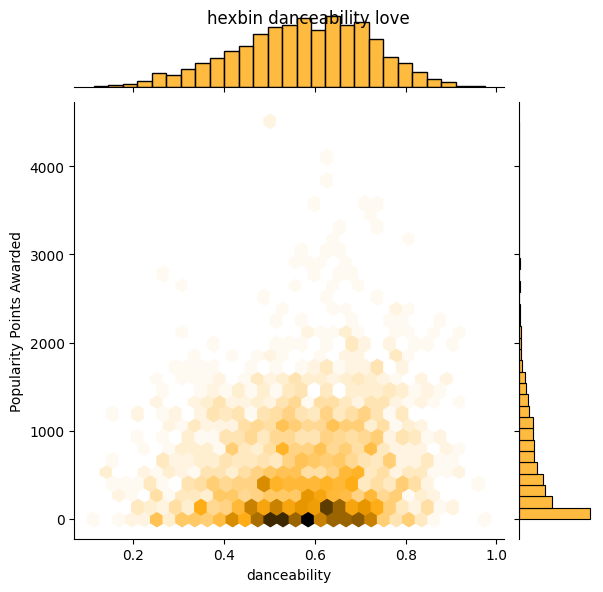

In [53]:
# im just doing this out of curiosity/sillies
fig = sns.jointplot(data=song_attribute_data_love, y="Popularity Points Awarded",x="danceability",kind='hex', color="orange")
fig.fig.suptitle("hexbin danceability love")
plt.show()

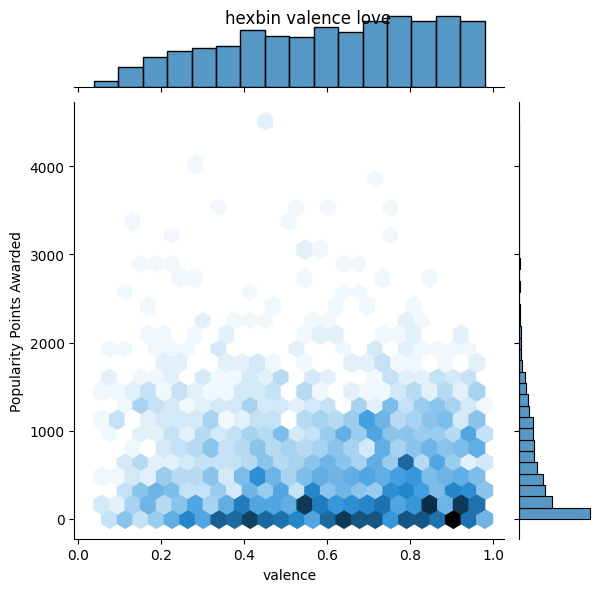

In [54]:
fig = sns.jointplot(data=song_attribute_data_love, y="Popularity Points Awarded",x="valence",kind='hex')
fig.fig.suptitle("hexbin valence love")
plt.show()